In [4]:
import pandas as pd
import numpy as np

In [116]:
df = pd.read_csv('C:/Users/rgangurde/Downloads/data.csv')

In [117]:
df.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [21]:
df.shape

(18207, 89)

# Creating a model to predict a player's Release Clause based on his abilities

In [22]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [118]:
X = df[['Age','Overall','Potential','Value']].values
Y = df['Release Clause'].values

In [132]:
X[:5,]

array([[31, 94, 94, 110500000.0],
       [33, 94, 94, 77000000.0],
       [26, 92, 93, 118500000.0],
       [27, 91, 93, 72000000.0],
       [27, 91, 92, 102000000.0]], dtype=object)

## Our Value field is string type. For computation purposes, we need it to be in float. 

In [121]:
for i in range(0,18207) :
    if X[i,3] !='' :
        val = X[i,3]
        newVal = val[1:(len(val)-1)]
        if newVal == '' :
            X[i,3] = 0
        else:
            base = val[len(val)-1:]
            if base == 'K':
                X[i,3] = float(newVal) * 1000
            if base == 'M':
                X[i,3] = float(newVal) * 1000000

## This should convert all of our data in the Value column to float type 

In [131]:
X[:5,:]

array([[31, 94, 94, 110500000.0],
       [33, 94, 94, 77000000.0],
       [26, 92, 93, 118500000.0],
       [27, 91, 93, 72000000.0],
       [27, 91, 92, 102000000.0]], dtype=object)

## Let's do the same for the Y feature set 

In [126]:
spec = 'wow'

for i in range(0,18207) :
    val = Y[i]
    if(type(val) != type(spec)):
        Y[i] = 0 
    else :
        newVal = val[1:(len(val)-1)]
        if newVal == '' :
            Y[i] = 0
        else :
            base = val[len(val)-1:]
            if base == 'K':
                Y[i] = float(newVal) * 1000
            if base == 'M' :
                Y[i] = float(newVal) * 1000000

In [134]:
Y[:5]

array([226500000.0, 127100000.0, 228100000.0, 138600000.0, 196400000.0],
      dtype=object)

## Data is prepared for computations now. Next, creating training and testing data set

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 4)

## Using Multiple Linear Regression

In [182]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
model = regr.fit(X_train, Y_train)
print('Coefficients :', model.coef_)

Coefficients : [ 3.53783838e+04 -6.55087135e+04  3.15935561e+04  1.86737408e+00]


In [183]:
yHat = model.predict(X_test)

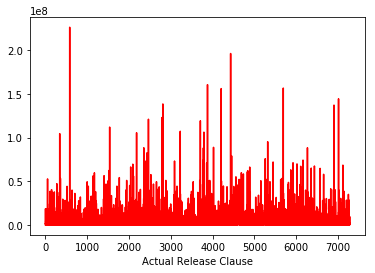

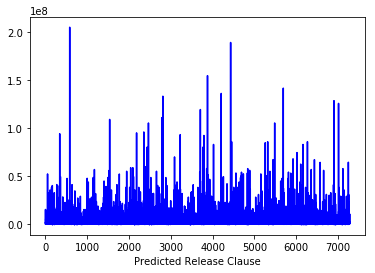

In [184]:
import matplotlib.pyplot as plt

plt.plot(Y_test, color = 'red')
plt.xlabel('Actual Release Clause')
plt.show()
plt.plot(yHat, color = 'blue')
plt.xlabel('Predicted Release Clause')
plt.show()

In [190]:
Xfea = [[30, 84, 88, 7700000.00]]
yFea = model.predict(Xfea)

In [191]:
print('The predicted Release Clause is €%.2f' %yFea[0])

The predicted Release Clause is €13621744.99


## Evaluating the model

In [192]:
from sklearn import metrics

print('The MSE is', np.mean((Y_test - yHat)**2))
print('The Variance score is', regr.score(X_test, Y_test))

The MSE is 7873671431802.124
The Variance score is 0.9321433498261218


# The Multiple Regression model uses 4 features of the 89 available. The model variance score is at 0.932 which is good. The next model will take in more features for prediction